Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

 

Note: Use the link below to reach to your dataset. 

In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.shape

(1000, 40)

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.replace('?', np.nan, inplace = True)

In [9]:
df.head(7)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   
5                 256   39         104594       12-10-2006           OH   
6                 137   34         413978       04-06-2000           IN   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   
5    250/500               1000                1351.10               0   
6    250/500               1000                1333.35               0   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                     NaN               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   
5       478456  ...                      NO              64100         6410   
6       441716  ...                     NaN              78650        21450   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   
5           6410         51280       Saab          95      2003   
6           7150         50050     Nissan  Pathfinder      2012   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  
5              Y  NaN  
6              N  NaN  

[7 rows x 40 columns]

In [10]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### Sometimes there are certain columns which contain the null value used to indicate missing or unknown values or maybe the value doesn’t exist. In our dataset the null values are present in columns collision_type, property_damage, police_report_available, and _c39 with 178, 360, 343 and 1000 number of null values

In [11]:
df.describe(include='all')

months_as_customer          age  policy_number policy_bind_date  \
count          1000.000000  1000.000000    1000.000000             1000   
unique                 NaN          NaN            NaN              951   
top                    NaN          NaN            NaN       01-01-2006   
freq                   NaN          NaN            NaN                3   
mean            203.954000    38.948000  546238.648000              NaN   
std             115.113174     9.140287  257063.005276              NaN   
min               0.000000    19.000000  100804.000000              NaN   
25%             115.750000    32.000000  335980.250000              NaN   
50%             199.500000    38.000000  533135.000000              NaN   
75%             276.250000    44.000000  759099.750000              NaN   
max             479.000000    64.000000  999435.000000              NaN   

       policy_state policy_csl  policy_deductable  policy_annual_premium  \
count          1000       1000        1000.000000            1000.000000   
unique            3          3                NaN                    NaN   
top              OH    250/500                NaN                    NaN   
freq            352        351                NaN                    NaN   
mean            NaN        NaN        1136.000000            1256.406150   
std             NaN        NaN         611.864673             244.167395   
min             NaN        NaN         500.000000             433.330000   
25%             NaN        NaN         500.000000            1089.607500   
50%             NaN        NaN        1000.000000            1257.200000   
75%             NaN        NaN        2000.000000            1415.695000   
max             NaN        NaN        2000.000000            2047.590000   

        umbrella_limit    insured_zip  ... police_report_available  \
count     1.000000e+03    1000.000000  ...                     657   
unique             NaN            NaN  ...                       2   
top                NaN            NaN  ...                      NO   
freq               NaN            NaN  ...                     343   
mean      1.101000e+06  501214.488000  ...                     NaN   
std       2.297407e+06   71701.610941  ...                     NaN   
min      -1.000000e+06  430104.000000  ...                     NaN   
25%       0.000000e+00  448404.500000  ...                     NaN   
50%       0.000000e+00  466445.500000  ...                     NaN   
75%       0.000000e+00  603251.000000  ...                     NaN   
max       1.000000e+07  620962.000000  ...                     NaN   

       total_claim_amount  injury_claim property_claim vehicle_claim  \
count          1000.00000   1000.000000    1000.000000   1000.000000   
unique                NaN           NaN            NaN           NaN   
top                   NaN           NaN            NaN           NaN   
freq                  NaN           NaN            NaN           NaN   
mean          52761.94000   7433.420000    7399.570000  37928.950000   
std           26401.53319   4880.951853    4824.726179  18886.252893   
min             100.00000      0.000000       0.000000     70.000000   
25%           41812.50000   4295.000000    4445.000000  30292.500000   
50%           58055.00000   6775.000000    6750.000000  42100.000000   
75%           70592.50000  11305.000000   10885.000000  50822.500000   
max          114920.00000  21450.000000   23670.000000  79560.000000   

        auto_make  auto_model    auto_year fraud_reported _c39  
count        1000        1000  1000.000000           1000  0.0  
unique         14          39          NaN              2  NaN  
top          Saab         RAM          NaN              N  NaN  
freq           80          43          NaN            753  NaN  
mean          NaN         NaN  2005.103000            NaN  NaN  
std           NaN         NaN     6.015861            NaN  NaN  
min           NaN         NaN  19

### Handling missing values

In [12]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [13]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### Finding unique values for each column ,TO understand which column is categorical and which one is Continuous ,Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous

In [14]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['_c39','incident_location']
df = df.drop(UselessColumns,axis=1)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                      NO               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 38 columns]

In [16]:
UselessColumns = ['policy_number','policy_annual_premium','insured_zip']
df = df.drop(UselessColumns,axis=1)
df.head()

months_as_customer  age policy_bind_date policy_state policy_csl  \
0                 328   48       17-10-2014           OH    250/500   
1                 228   42       27-06-2006           IN    250/500   
2                 134   29       06-09-2000           OH    100/300   
3                 256   41       25-05-1990           IL    250/500   
4                 228   44       06-06-2014           IL   500/1000   

   policy_deductable  umbrella_limit insured_sex insured_education_level  \
0               1000               0        MALE                      MD   
1               2000         5000000        MALE                      MD   
2               2000         5000000      FEMALE                     PhD   
3               2000         6000000      FEMALE                     PhD   
4               1000         6000000        MALE               Associate   

  insured_occupation  ... witnesses police_report_available  \
0       craft-repair  ...         2                     YES   
1  machine-op-inspct  ...         0                      NO   
2              sales  ...         3                      NO   
3       armed-forces  ...         2                      NO   
4              sales  ...         1                      NO   

   total_claim_amount  injury_claim property_claim vehicle_claim  auto_make  \
0               71610          6510          13020         52080       Saab   
1                5070           780            780          3510   Mercedes   
2               34650          7700           3850         23100      Dodge   
3               63400          6340           6340         50720  Chevrolet   
4                6500          1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 35 columns]

## Visualization Exploratory Data Analysis(EDA)

##### We use bar charts to see how the data is distributed for these categorical columns.

### Correlation

<AxesSubplot:xlabel='policy_state', ylabel='count'>

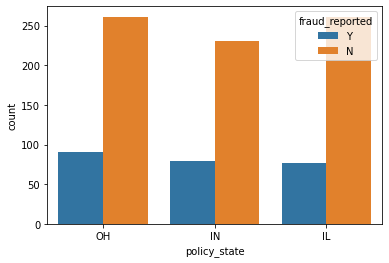

In [17]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

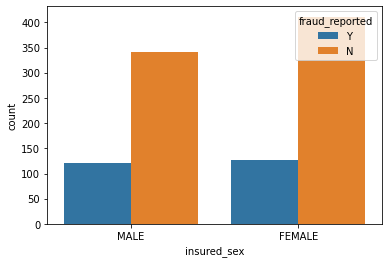

In [18]:
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

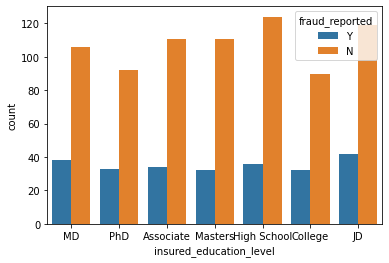

In [19]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

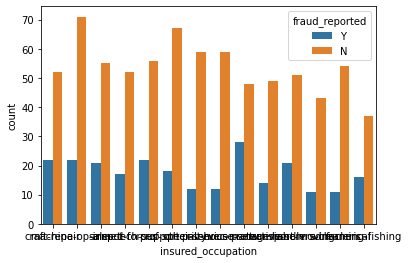

In [20]:
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

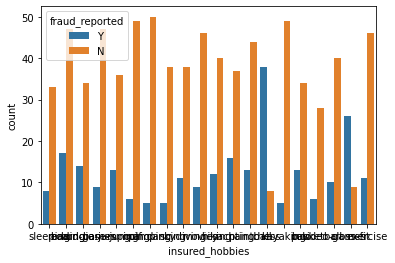

In [21]:
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

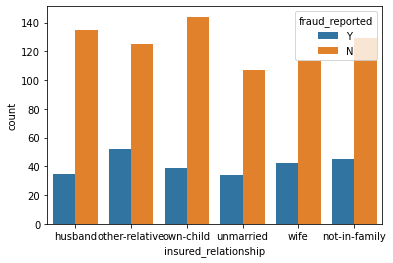

In [22]:
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

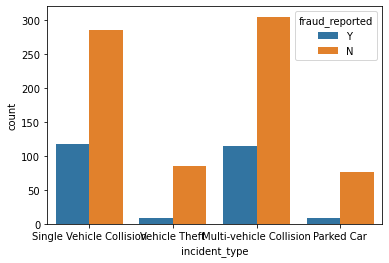

In [23]:
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

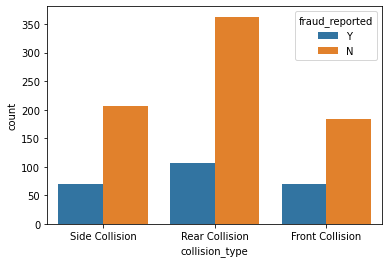

In [24]:
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

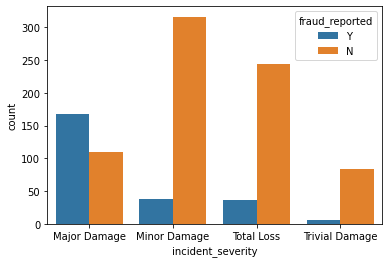

In [25]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

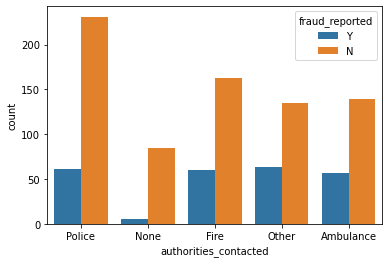

In [26]:
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

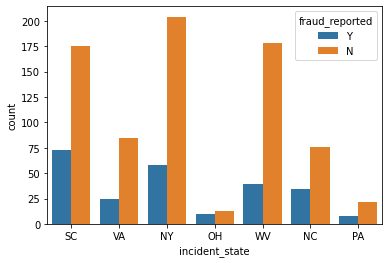

In [27]:
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

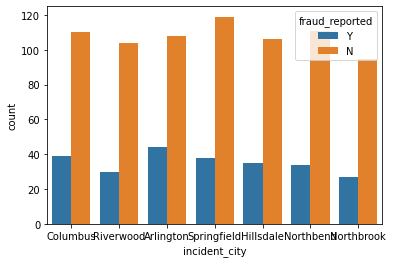

In [28]:
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

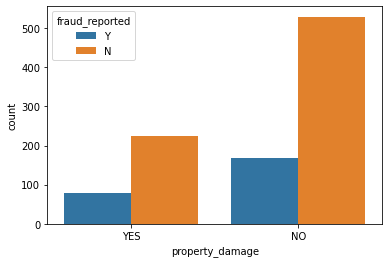

In [29]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

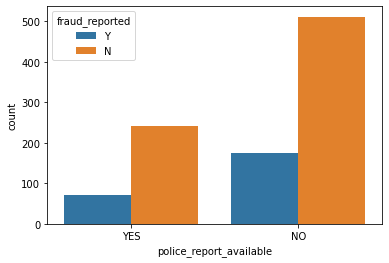

In [30]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

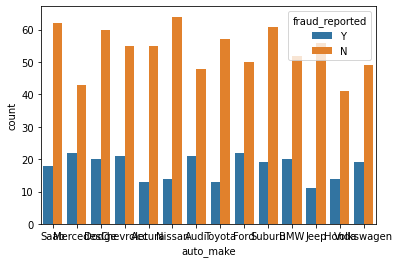

In [31]:
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

### Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'months_as_customer'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'policy_deductable'}>,
        <AxesSubplot:title={'center':'umbrella_limit'}>],
       [<AxesSubplot:title={'center':'capital-gains'}>,
        <AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'incident_hour_of_the_day'}>,
        <AxesSubplot:title={'center':'number_of_vehicles_involved'}>],
       [<AxesSubplot:title={'center':'bodily_injuries'}>,
        <AxesSubplot:title={'center':'witnesses'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:title={'center':'injury_claim'}>],
       [<AxesSubplot:title={'center':'property_claim'}>,
        <AxesSubplot:title={'center':'vehicle_claim'}>,
        <AxesSubplot:title={'center':'auto_year'}>, <AxesSubplot:>]],
      dtype=object)

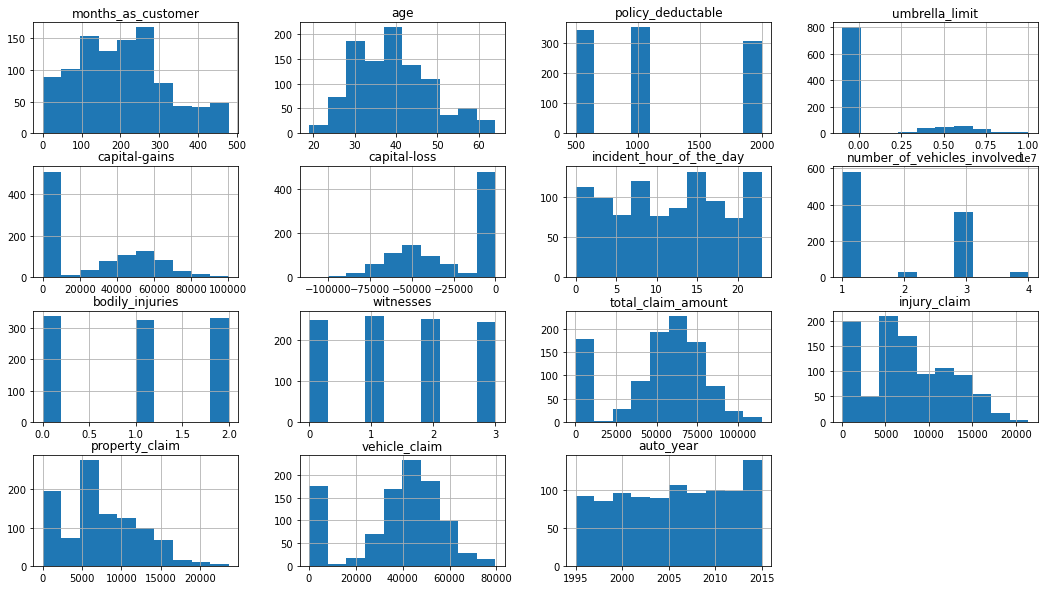

In [32]:
# Plotting histograms of multiple columns together
df.hist(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
        'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], figsize=(18,10))

In [33]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_bind_date','policy_state','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

df.drop(to_drop, inplace = True, axis = 1)


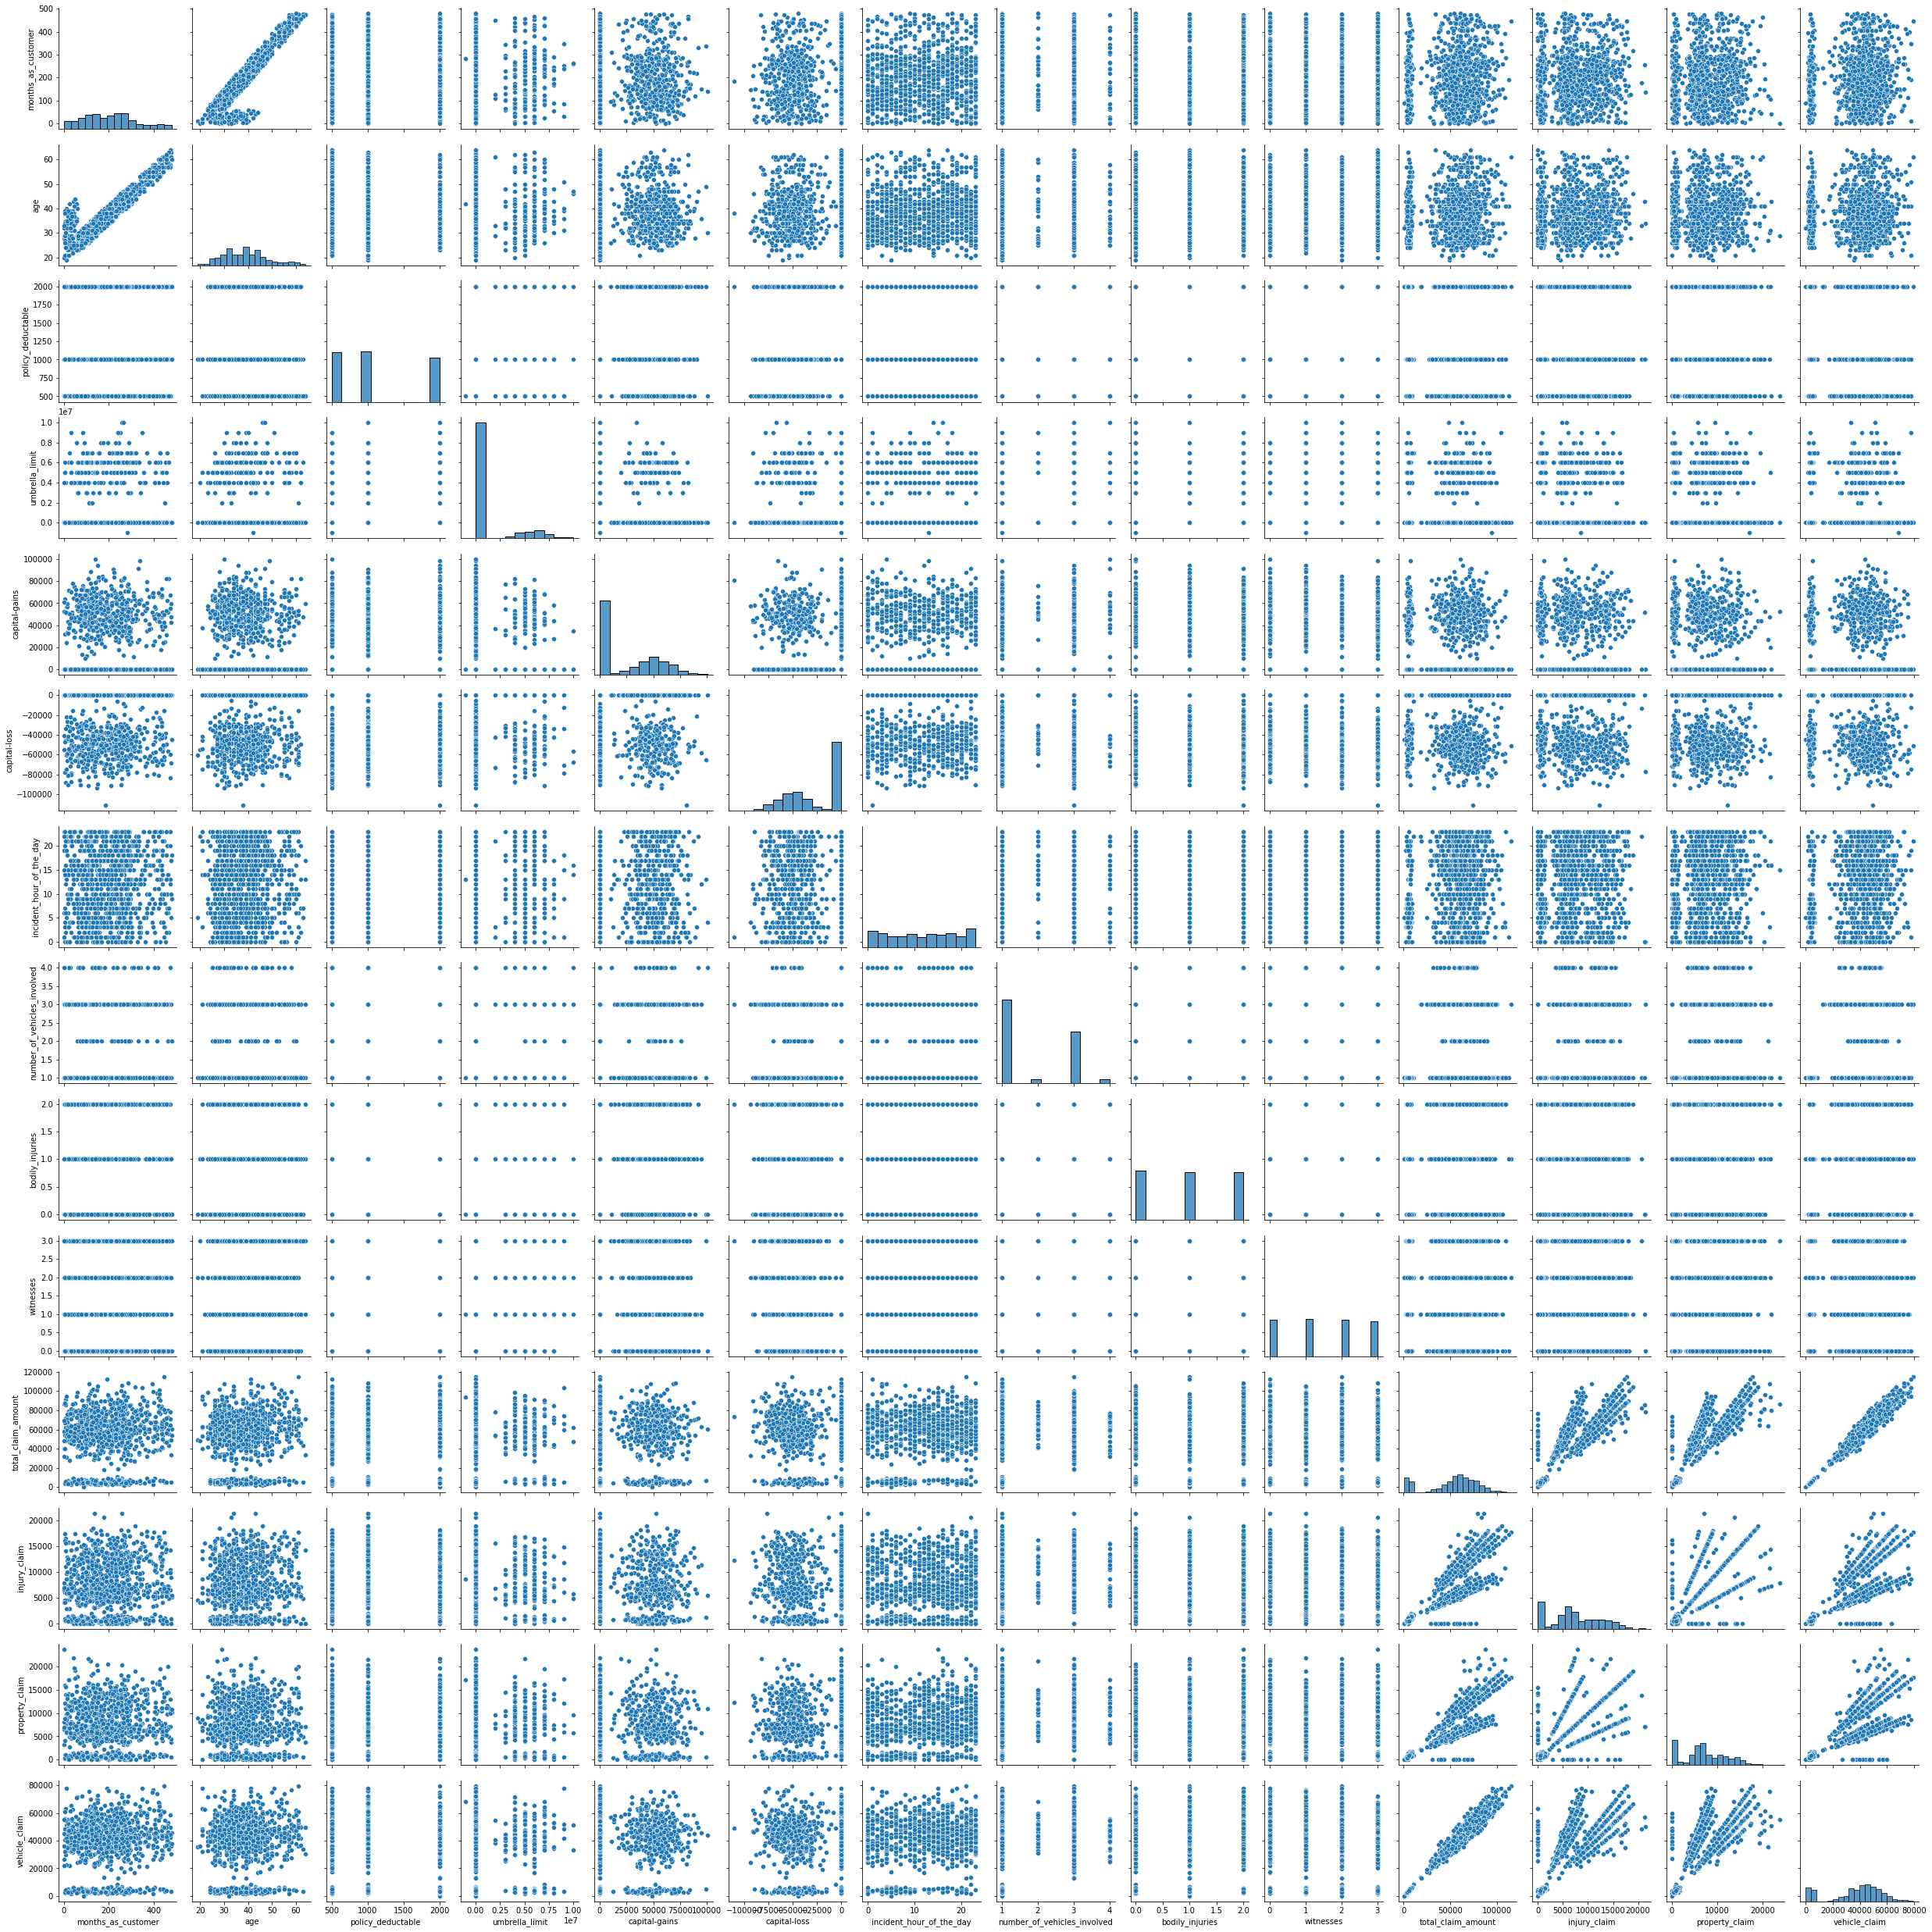

In [34]:
sns.pairplot(df)
plt.show()

## Let's apply coding technique

In [35]:
df['fraud_reported'] = df.fraud_reported.map({'N':0,'Y':1})



In [36]:
df.head(2)

months_as_customer  age policy_csl  policy_deductable  umbrella_limit  \
0                 328   48    250/500               1000               0   
1                 228   42    250/500               2000         5000000   

  insured_sex insured_education_level insured_occupation insured_relationship  \
0        MALE                      MD       craft-repair              husband   
1        MALE                      MD  machine-op-inspct       other-relative   

   capital-gains  ...  number_of_vehicles_involved property_damage  \
0          53300  ...                            1             YES   
1              0  ...                            1              NO   

  bodily_injuries witnesses police_report_available  total_claim_amount  \
0               1         2                     YES               71610   
1               0         0                      NO                5070   

   injury_claim property_claim  vehicle_claim  fraud_reported  
0          6510          13020          52080               1  
1           780            780           3510               1  

[2 rows x 26 columns]

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [38]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [39]:
df.head(2)

months_as_customer  age  policy_csl  policy_deductable  umbrella_limit  \
0                 328   48         1.0               1000               0   
1                 228   42         1.0               2000         5000000   

   insured_sex  insured_education_level  insured_occupation  \
0          1.0                      4.0                 2.0   
1          1.0                      4.0                 6.0   

   insured_relationship  capital-gains  ...  number_of_vehicles_involved  \
0                   0.0          53300  ...                            1   
1                   2.0              0  ...                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              0.0                0          0                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0               71610          6510           13020          52080   
1                5070           780             780           3510   

   fraud_reported  
0               1  
1               1  

[2 rows x 26 columns]

In [40]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [41]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [42]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [43]:
df.head(2)

months_as_customer  age  policy_csl  policy_deductable  umbrella_limit  \
0                 328   48         1.0               1000               0   
1                 228   42         1.0               2000         5000000   

   insured_sex  insured_education_level  insured_occupation  \
0          1.0                      4.0                 2.0   
1          1.0                      4.0                 6.0   

   insured_relationship  capital-gains  ...  number_of_vehicles_involved  \
0                   0.0          53300  ...                            1   
1                   2.0              0  ...                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0              1.0                1          2                      1.0   
1              0.0                0          0                      0.0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0               71610          6510           13020          52080   
1                5070           780             780           3510   

   fraud_reported  
0               1  
1               1  

[2 rows x 26 columns]

### now i have clean data

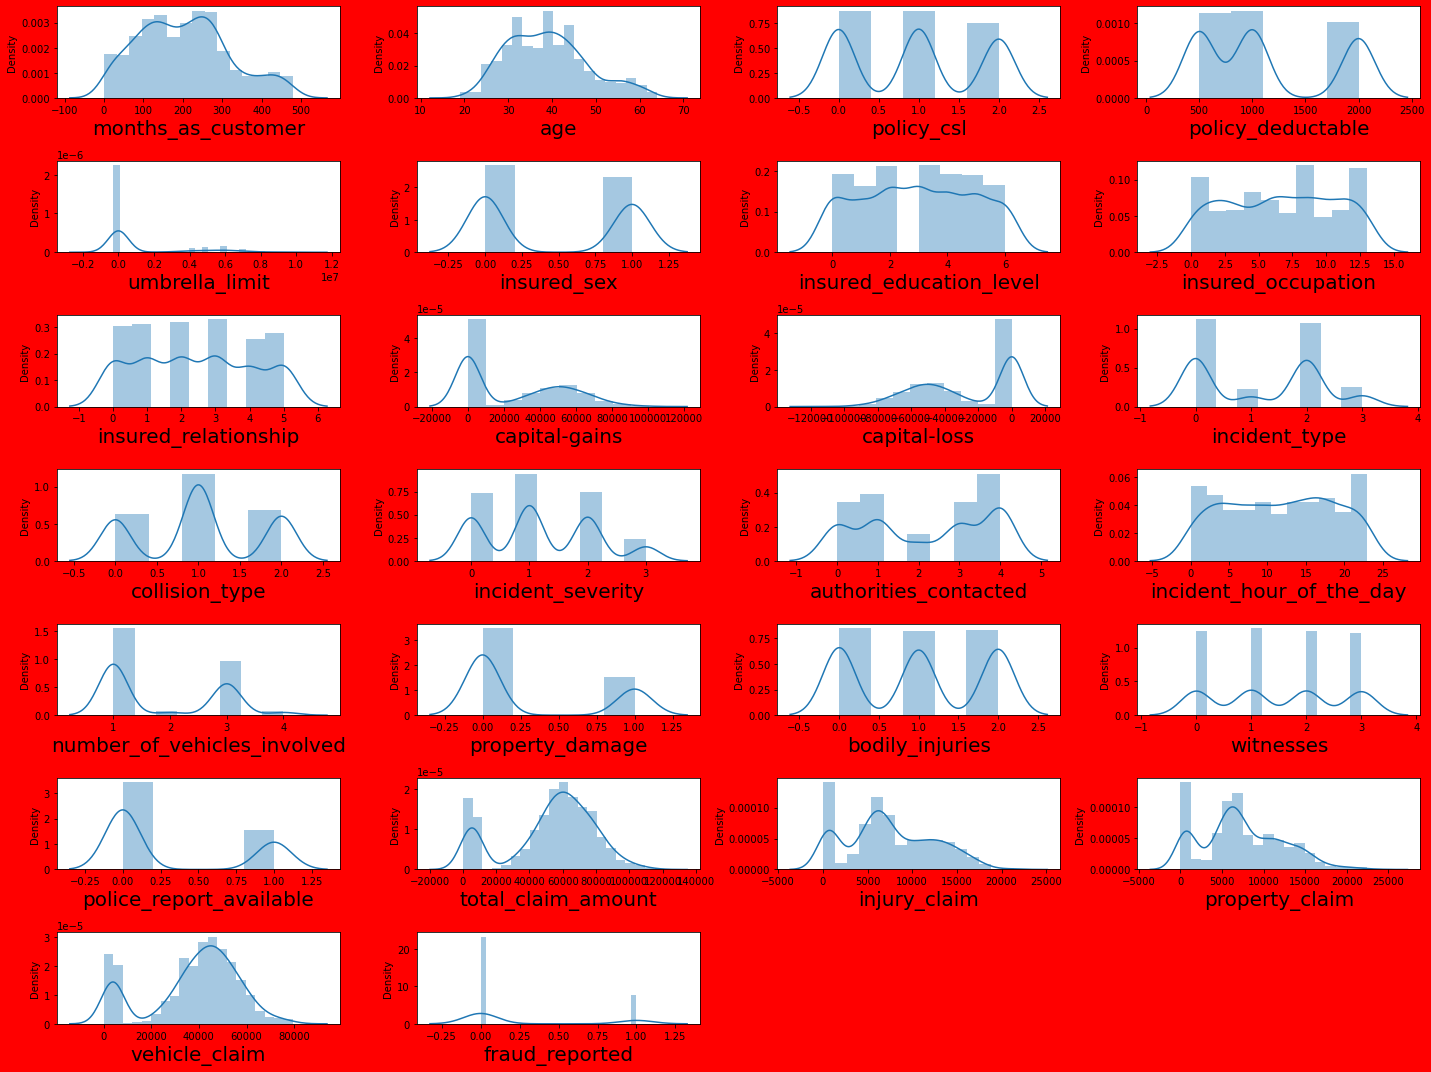

In [44]:
# visualizing data distribution in every column
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=26:   # there are 26 column is the given data
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [45]:
# Checking the counts of label categories
fraud = df['fraud_reported'].value_counts(normalize=True)
round(fraud * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

### data is not balance , apply imbalancer for this

## check skewness and outliers and correlation

In [46]:
df.corr()['fraud_reported'].sort_values()

incident_severity             -0.405988
incident_type                 -0.050376
authorities_contacted         -0.045802
policy_csl                    -0.037190
police_report_available       -0.027768
capital-gains                 -0.019173
collision_type                -0.017315
capital-loss                  -0.014863
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
insured_education_level        0.008808
age                            0.012143
policy_deductable              0.014817
property_damage                0.017202
months_as_customer             0.020544
insured_relationship           0.021043
insured_sex                    0.030873
bodily_injuries                0.033877
witnesses                      0.049497
number_of_vehicles_involved    0.051839
umbrella_limit                 0.058622
injury_claim                   0.090975
property_claim                 0.137835
total_claim_amount             0.163651
vehicle_claim                  0.170049


## heatmap

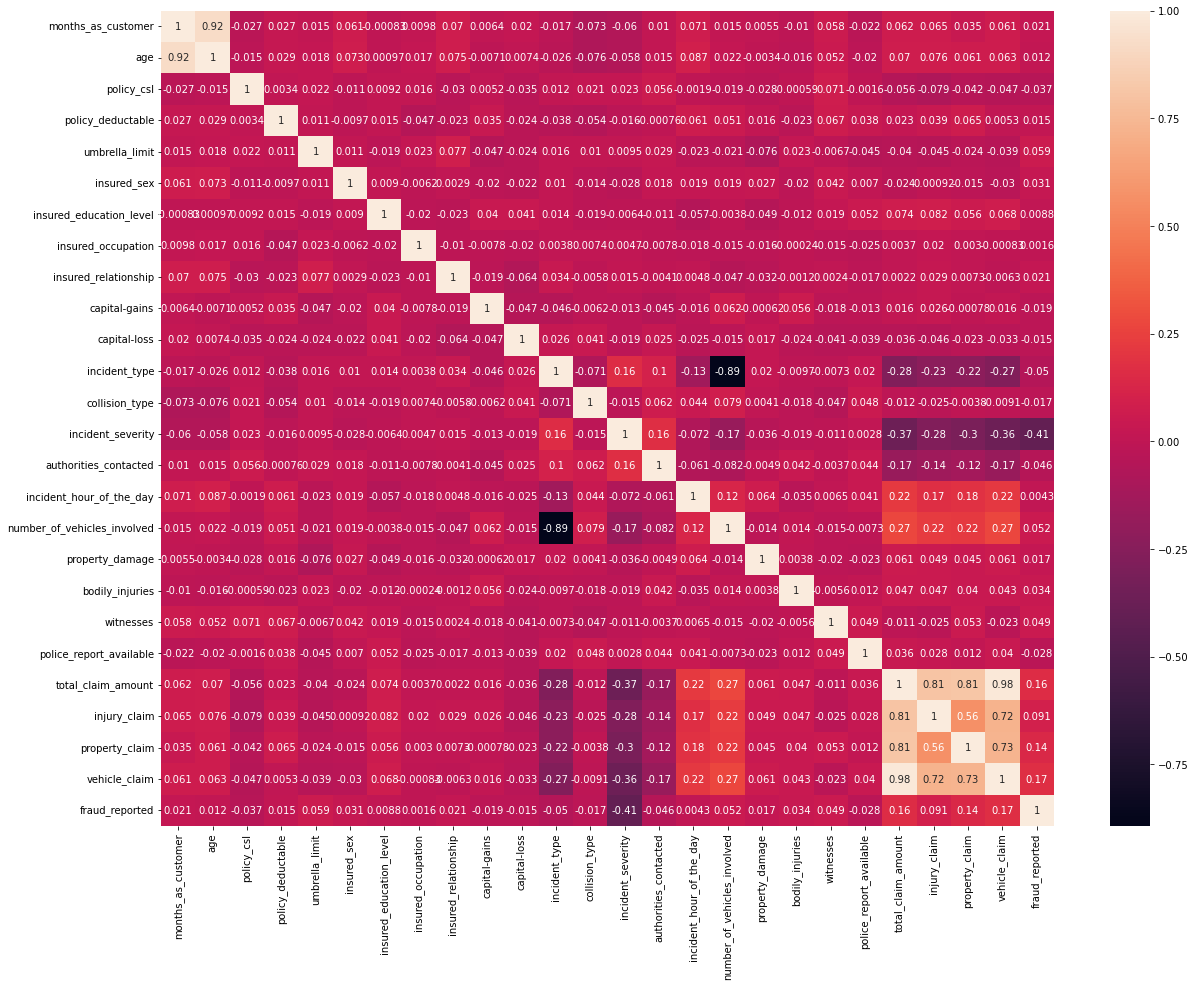

In [47]:
# plotting heat map
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True)
plt.show()

### From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. 

In [48]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

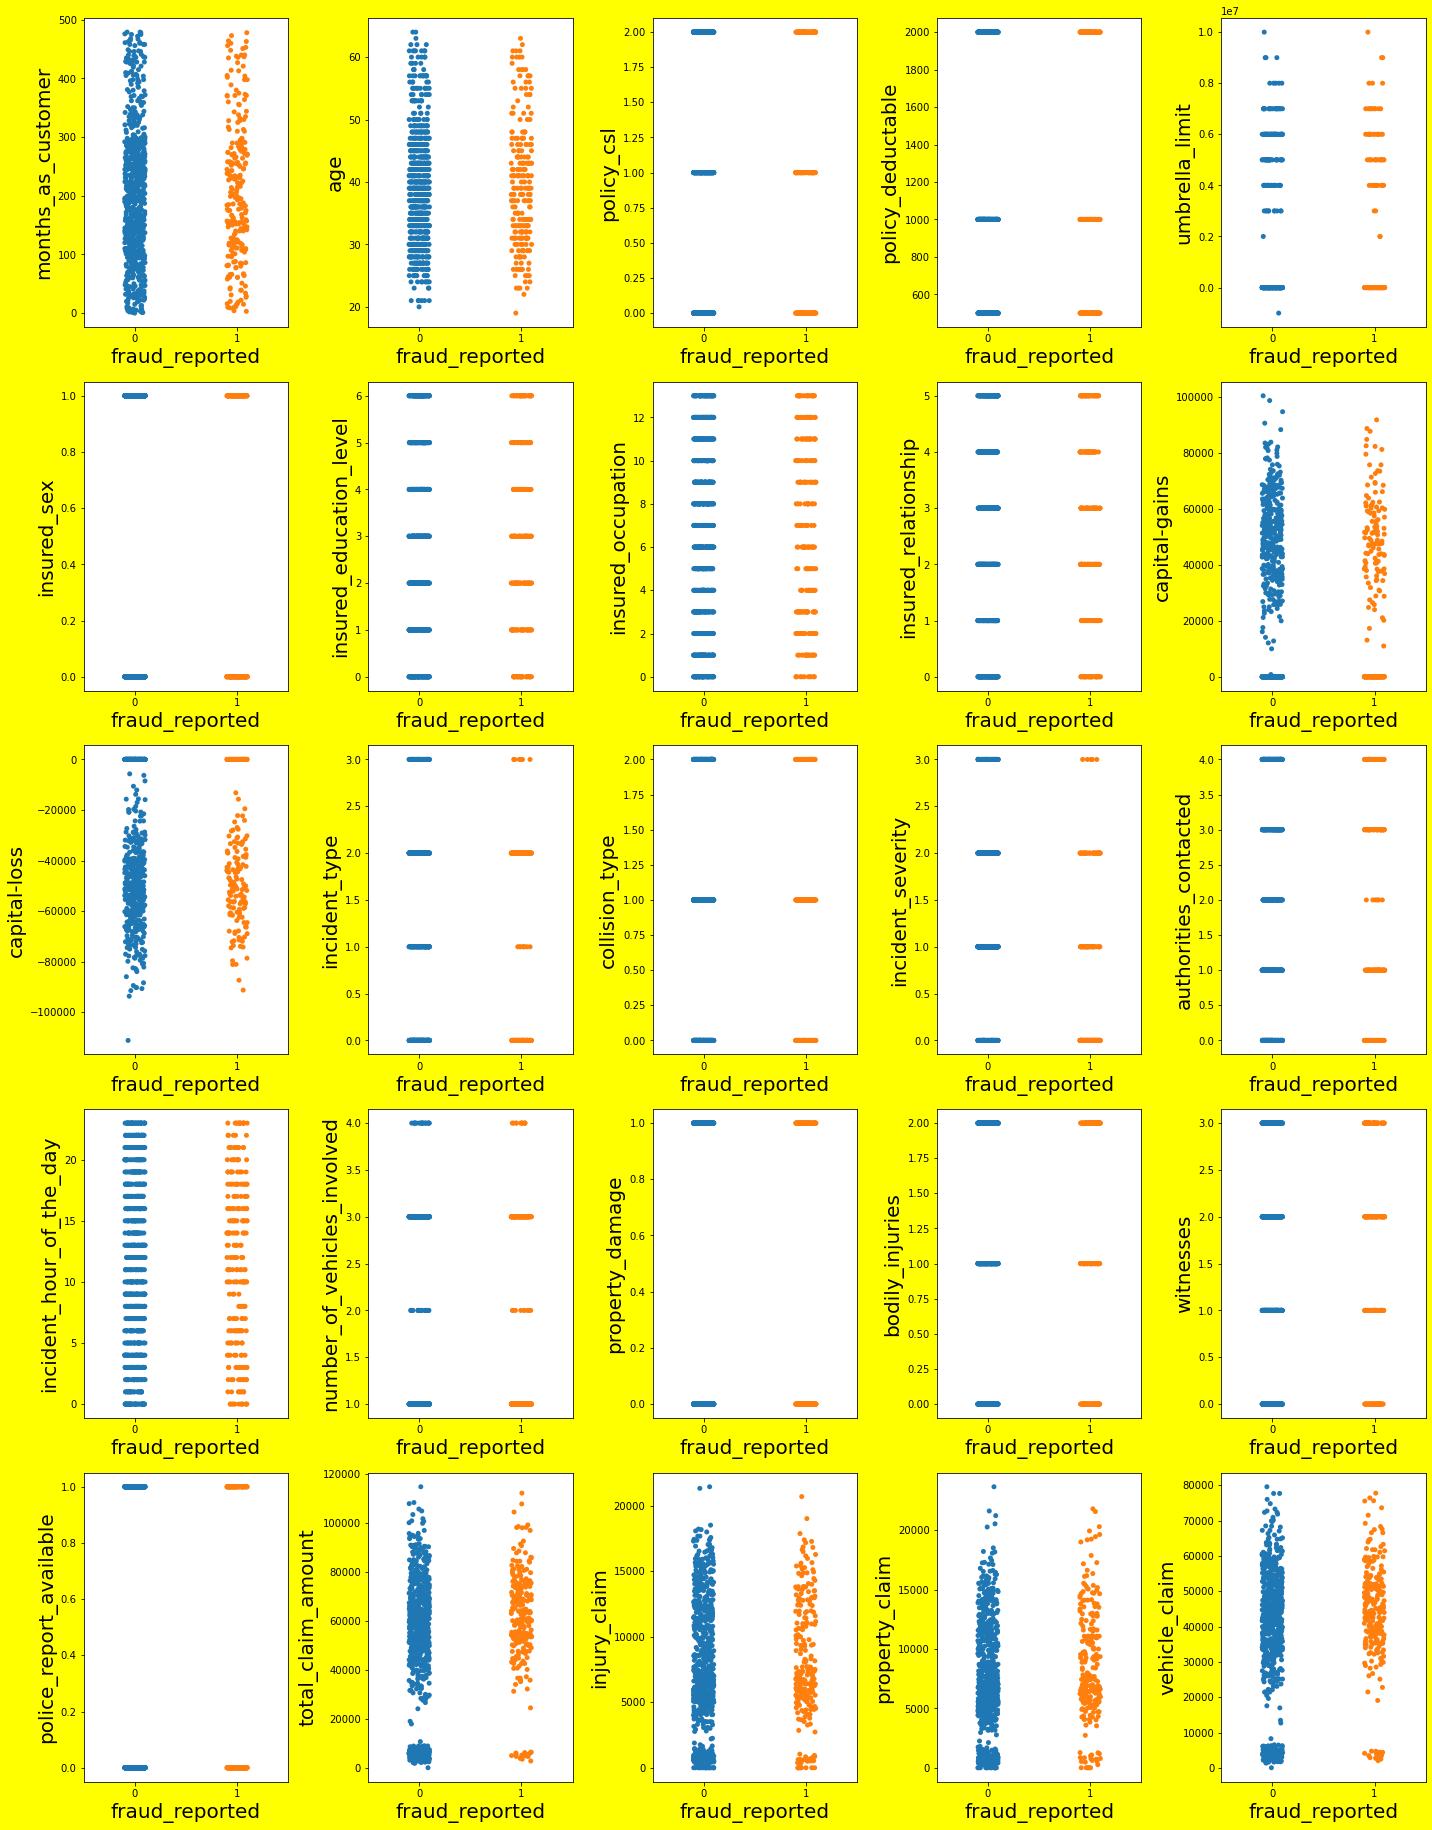

In [49]:
#interpreting relationship between independent variables and dependent class
plt.figure(figsize = (20,30), facecolor = 'yellow')
plotnum = 1

y = df['fraud_reported']
for col in X:
    if plotnum<=27:
        plt.subplot(6,5,plotnum)
        sns.stripplot(y,X[col])
        plt.xlabel('fraud_reported',fontsize = 20)
        plt.ylabel(col, fontsize = 20)
    plotnum+=1
plt.tight_layout()

In [50]:
X.skew()

months_as_customer             0.362177
age                            0.478988
policy_csl                     0.088928
policy_deductable              0.477887
umbrella_limit                 1.806712
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098


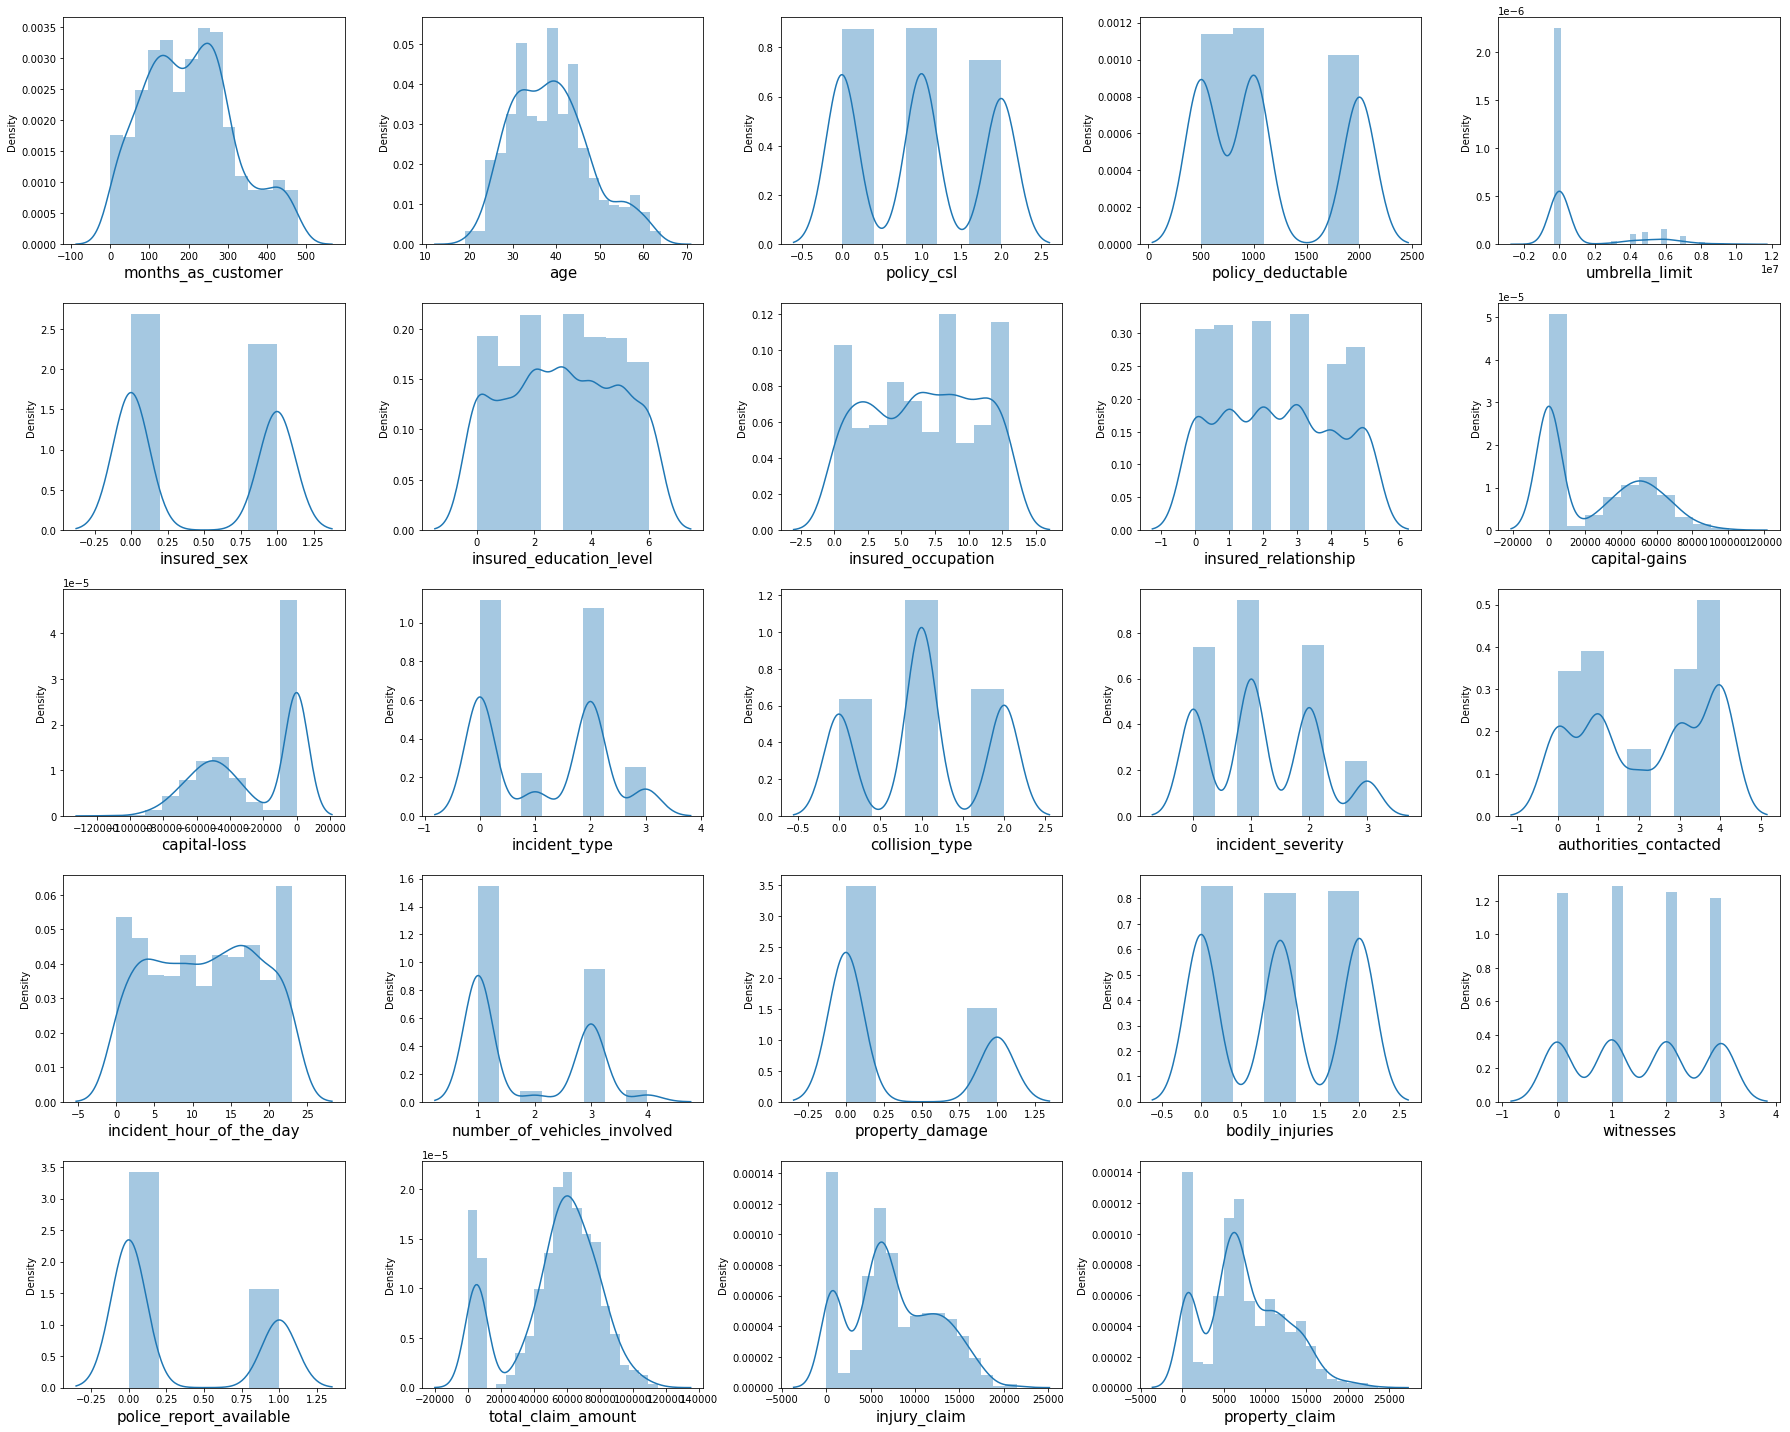

In [51]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

### outliers detection

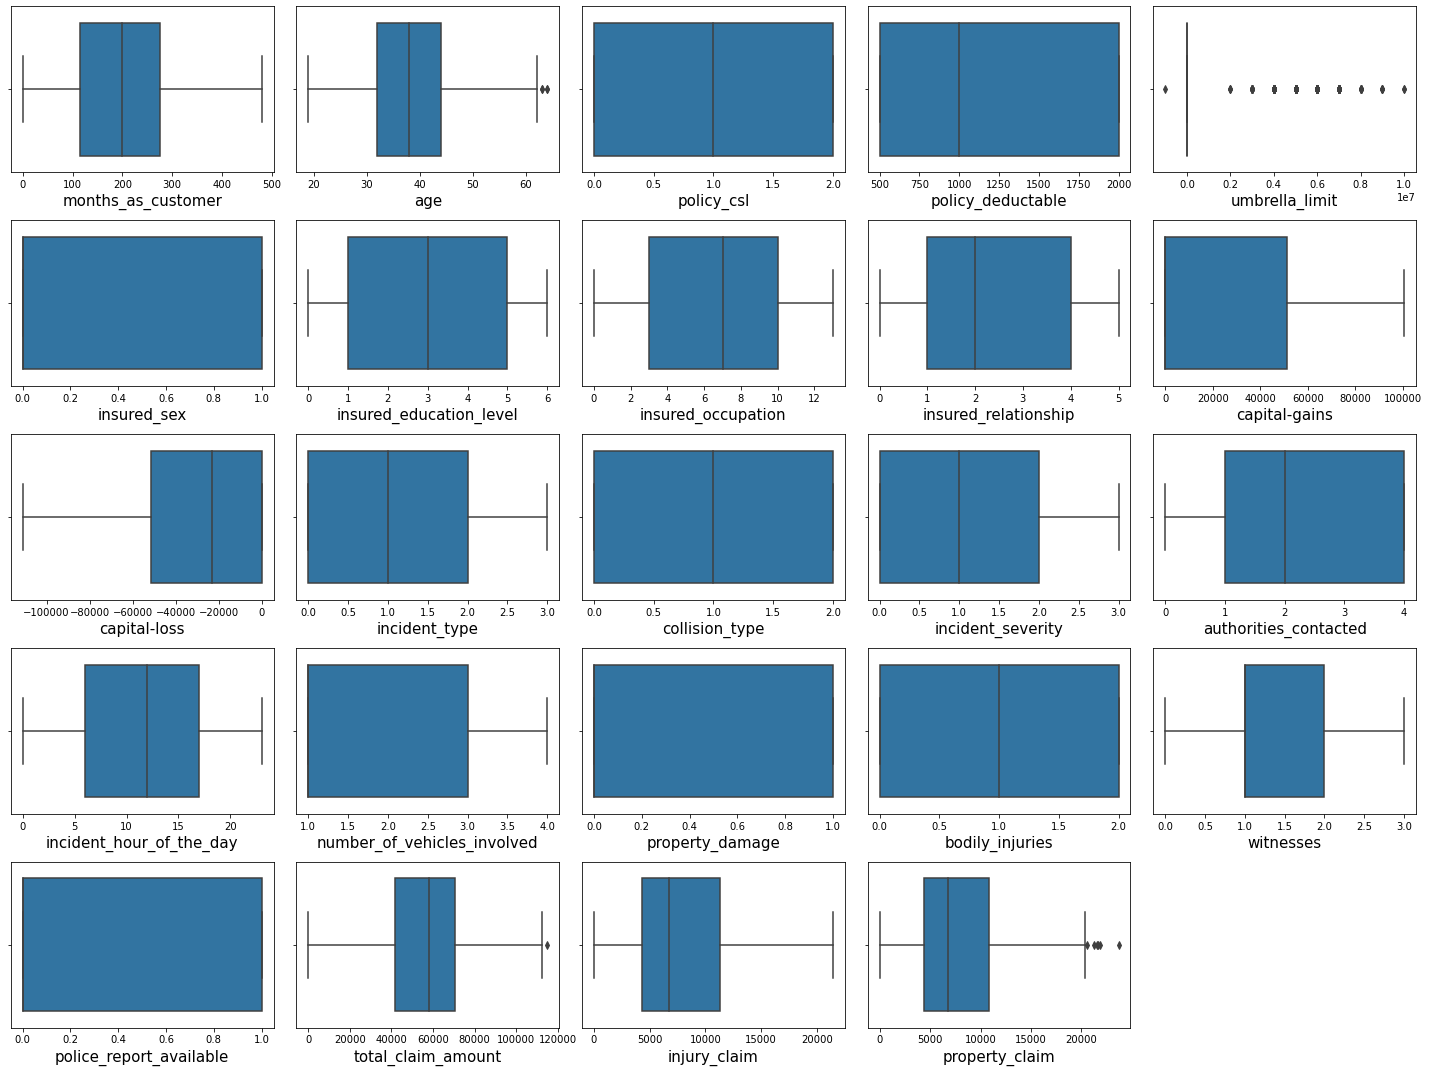

In [52]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [57]:

numerical_features = ['property_claim','total_claim_amount','umbrella_limit']
df_num = df[numerical_features]
df_num.describe()
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1
IQR
((df_num<(Q1-1.5*IQR))|(df_num>(Q3+1.5*IQR))).any()
        

property_claim        True
total_claim_amount    True
umbrella_limit        True
dtype: bool

In [58]:
df.shape

(1000, 26)

In [59]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 31,  48,  88, 115, 119, 262, 314, 430, 458, 500, 503, 657, 700,
        807, 875, 922, 975], dtype=int64),
 array([ 4,  4,  4,  4,  4,  4,  4,  4,  4, 23,  4,  4,  4, 10,  4,  4,  4],
       dtype=int64))

In [61]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

months_as_customer  age  policy_csl  policy_deductable  umbrella_limit  \
0                   328   48         1.0               1000               0   
1                   228   42         1.0               2000         5000000   
2                   134   29         0.0               2000         5000000   
3                   256   41         1.0               2000         6000000   
4                   228   44         2.0               1000         6000000   
..                  ...  ...         ...                ...             ...   
995                   3   38         2.0               1000               0   
996                 285   41         0.0               1000               0   
997                 130   34         1.0                500         3000000   
998                 458   62         2.0               2000         5000000   
999                 456   60         1.0               1000               0   

     insured_sex  insured_education_level  insured_occupation  \
0            1.0                      4.0                 2.0   
1            1.0                      4.0                 6.0   
2            0.0                      6.0                11.0   
3            0.0                      6.0                 1.0   
4            1.0                      0.0                11.0   
..           ...                      ...                 ...   
995          0.0                      5.0                 2.0   
996          0.0                      6.0                 9.0   
997          0.0                      5.0                 1.0   
998          1.0                      0.0                 5.0   
999          0.0                      0.0                11.0   

     insured_relationship  capital-gains  ...  number_of_vehicles_involved  \
0                     0.0          53300  ...                            1   
1                     2.0              0  ...                            1   
2                     3.0          35100  ...                            3   
3                     4.0          48900  ...                            1   
4                     4.0          66000  ...                            1   
..                    ...            ...  ...                          ...   
995                   4.0              0  ...                            1   
996                   5.0          70900  ...                            1   
997                   2.0          35100  ...                            3   
998                   5.0              0  ...                            1   
999                   0.0              0  ...                            1   

     property_damage  bodily_injuries  witnesses  police_report_available  \
0                1.0                1          2                      1.0   
1                0.0                0          0                      0.0   
2                0.0                2          3                      0.0   
3                0.0                1          2                      0.0   
4                0.0                0          1                      0.0   
..               ...              ...        ...                      ...   
995              1.0                0          1                      0.0   
996              1.0                2          3                      0.0   
997              0.0                2          3                      1.0   
998              0.0                0          1                      1.0   
999              0.0                0          3                      0.0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650

In [63]:
df_new_z.shape

(983, 26)

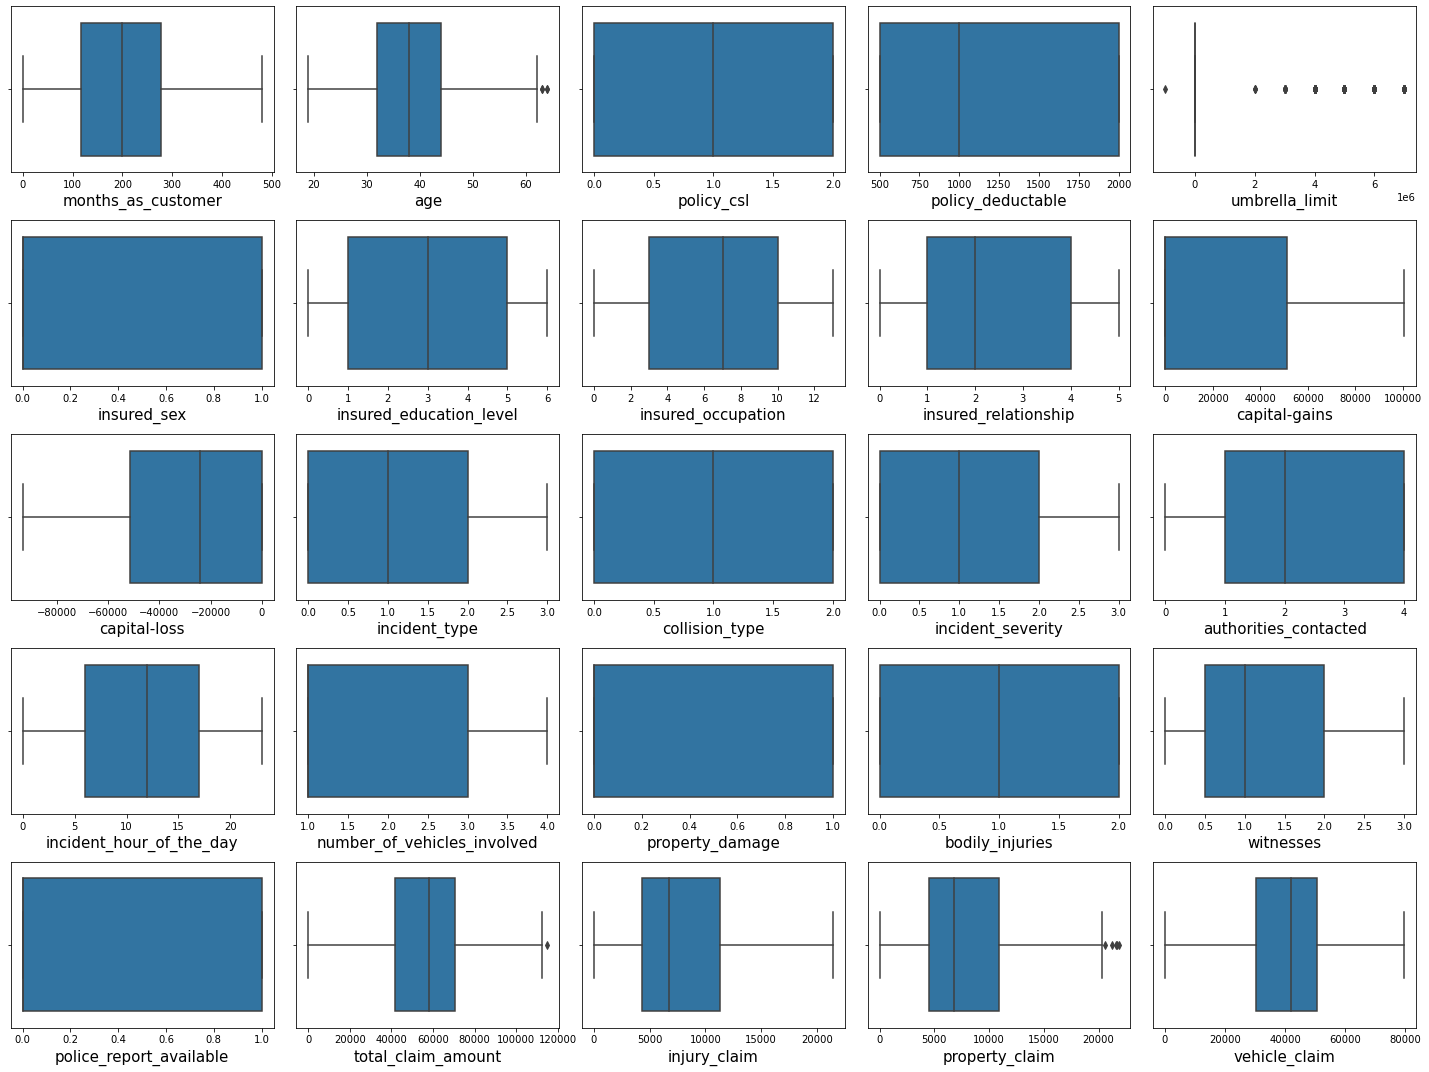

In [66]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in df_new_z.columns:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df_new_z[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [67]:
X = df.drop("fraud_reported",axis=1)
Y = df["fraud_reported"]

## Feature Scaling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling

In [70]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

In [71]:
from imblearn.over_sampling import RandomOverSampler

In [72]:
ros = RandomOverSampler(random_state=42)

In [73]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [74]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [75]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: fraud_reported, dtype: object

## Creating Train and Test data

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [77]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (1204, 25)
X_test shape: (302, 25)
Y_train shape: (1204,)
Y_test shape: (302,)


## Data Modeling

### 1.. Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [79]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [80]:
Y_pred_log_reg = log_reg.predict(X_test)

### 2...KNN classifier

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [85]:
Y_pred_knn = knn.predict(X_test)

### 3..Support Vector classifier

In [82]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [86]:
Y_pred_svc = svc.predict(X_test)

#### 4.. Naive Bias classifier

In [83]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [84]:
Y_pred_nb = nb.predict(X_test)

### 5...Decision Tree Classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [88]:
Y_pred_dec_tree = dec_tree.predict(X_test)

### 6...Random Forest Classifier¶

In [89]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [90]:
Y_pred_ran_for = ran_for.predict(X_test)

## Model Evaluation

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [92]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 74.83
F1 score: 76.4


In [93]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 69.21
F1 score: 71.38


In [94]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 84.11
F1 score: 85.37


In [95]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 67.55
F1 score: 71.84


In [99]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 85.76
F1 score: 87.46


In [97]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 91.06
F1 score: 91.89


### we can see that all model are well trained..but Random Forest Classifier gives higest Accuracy= 91.06 and F1 score is also good=91.89 .so we select this model for hyperparameter tuning,,,...¶

## Hyperparameter tuning

In [98]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(X) for X in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(X) for X in np.linspace(40, 150, num=15)]

In [100]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [101]:
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [102]:
rf_cv.best_score_

0.9028457814661135

In [103]:
rf_cv.best_params_

{'n_estimators': 134, 'max_depth': 142}

In [104]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [105]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [106]:
Y_pred_rf_best = rf_best.predict(X_test)

In [107]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 90.4
F1 score: 91.24


## Confusion matrix

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

In [109]:
cm

array([[122,  20],
       [  9, 151]], dtype=int64)

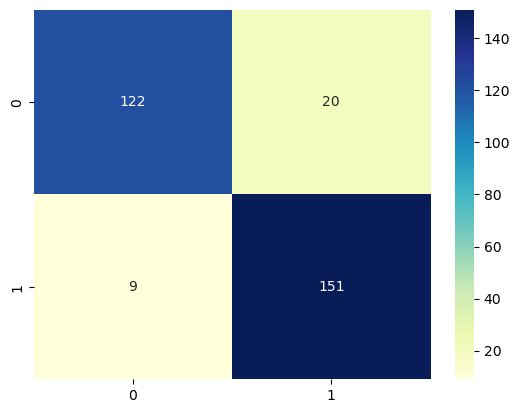

In [110]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [111]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       142
           1       0.88      0.94      0.91       160

    accuracy                           0.90       302
   macro avg       0.91      0.90      0.90       302
weighted avg       0.91      0.90      0.90       302



## ROC AUC curve

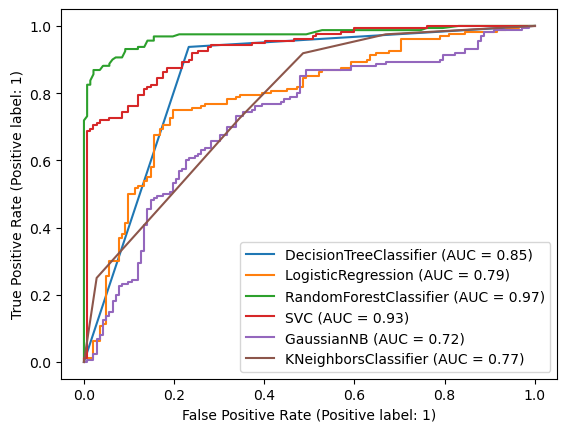

In [112]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dec_tree,X_test,Y_test)
mod = [log_reg,ran_for,svc,nb,knn]

for i in mod:
    plot_roc_curve(i,X_test,Y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

## above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.97

## Best Model save

In [113]:
import joblib
joblib.dump(rf_best,"Best_data.pkl")

['Best_data.pkl']

In [114]:
mod = joblib.load("Best_data.pkl")
print(mod.predict(X_test))

[0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1
 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1
 1 0 1 0 1 1]


In [115]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(Y_test)
predicted = np.array(mod.predict(X_test))
data_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
data_con

orginal  predicted
0          0          0
1          1          1
2          1          1
3          0          0
4          0          0
..       ...        ...
297        0          0
298        1          1
299        0          0
300        1          1
301        1          1

[302 rows x 2 columns]

## this is best model for this dataset..if i have damage property deatail and complain file then we can easily get the fraud